# Quantification of the Border
# Introduction

The main objective of this notebook ist to fetch parameters of border of given nevi

# Imports

In [2]:
from functions import *
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

# Loading image and using Sobel filter
Sobel filter will be used to gain information about magnitude of gradient of given image.

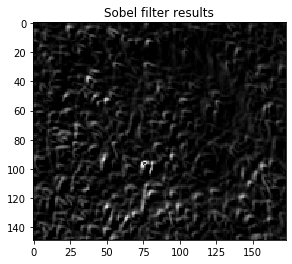

In [3]:
img = cv2.imread('39.jpg')

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Remove uneven ilumination
img_gray = remove_uneven_ilumination(img_gray)

# Grayscale image processed by Sobel filter
img_gray_sobel_edgesx = cv2.Sobel(img_gray, -1, dx=1, dy=0, scale=1, delta=0,
                                  borderType=cv2.BORDER_DEFAULT)

img_gray_sobel_edgesy = cv2.Sobel(img_gray, -1, dx=0, dy=1, scale=1, delta=0,
                                  borderType=cv2.BORDER_DEFAULT)

img_gray_sobel_edges = img_gray_sobel_edgesx + img_gray_sobel_edgesy

simg(img_gray_sobel_edges, "Sobel filter results")

# Image tresholding

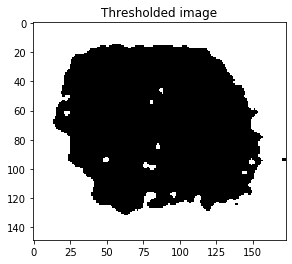

In [4]:
img_thres = prepare_image_peak_slicing(img, median_filter=True)
simg(img_thres, "Thresholded image")

# Finding conotur

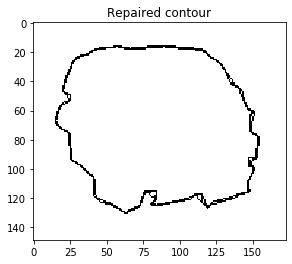

In [6]:
contour = find_pigmented_contour(img_thres)
contour_repaired = repair_contour(contour)
contour_repaired_img = shape_matrix(img, contour_repaired)

simg(contour_repaired_img, "Repaired contour")

# Creating border mask
Mask will be used to specify border area. Obtained mask selects border pixels on image processed by Sobel filter.

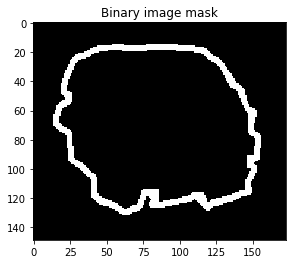

In [9]:
contour_repaired_img_dilate = cv2.bitwise_not(contour_repaired_img)
contour_repaired_img_dilate = cv2.dilate(contour_repaired_img_dilate, np.ones((3, 3), np.uint8), iterations=1)
simg(contour_repaired_img_dilate, "Binary image mask")

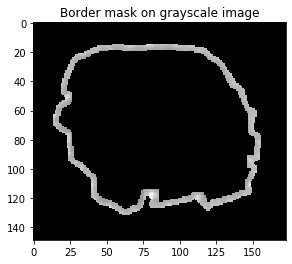

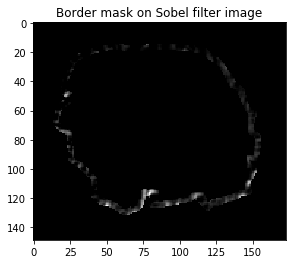

In [10]:
# Original border and Sobel border
img_border = img_gray.copy()
sobel_border = img_gray_sobel_edges.copy()
for x in range(0, contour_repaired_img_dilate.shape[0]):
    for y in range(0, contour_repaired_img_dilate.shape[1]):
        if contour_repaired_img_dilate[x][y] == 0:
            img_border[x][y] = 0
            sobel_border[x][y] = 0
            
simg(img_border, "Border mask on grayscale image")
simg(sobel_border, "Border mask on Sobel filter image")

# Calculation of parameters

## Average of gradient magnitude $\mu$

In [11]:
# Calculate u
u_sum = 0
N = 0 # to count in loop
for x in range(0, contour_repaired_img_dilate.shape[0]):
    for y in range(0, contour_repaired_img_dilate.shape[1]):
        if contour_repaired_img_dilate[x][y] != 0:
            N+=1
            u_sum += abs(img_border[x][y]*sobel_border[x][y])

u = u_sum/N
print("u = {}".format(u))


u = 91.55421686746988


C:\Users\ppogu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in ubyte_scalars
  


## Variance of gradient magnitude $\sigma^{2}$

In [12]:
# Calculate o
o_sum = 0
for x in range(0, contour_repaired_img_dilate.shape[0]):
    for y in range(0, contour_repaired_img_dilate.shape[1]):
        if contour_repaired_img_dilate[x][y] != 0:
            o_sum += (abs(img_border[x][y]*sobel_border[x][y]) - u)**2
            
o = o_sum/N
print("o = {}".format(o))

o = 7062.728988242138


C:\Users\ppogu\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in ubyte_scalars
  
